In [2]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle
from joblib import dump


In [3]:
with open("data//vectorized_refined_cluster.pkl", 'rb') as temp:
    vect_df = pickle.load(temp)
vect_df

,Age,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,...,tiktok,twitter,youtube,baseball,basketball,football,hockey,other,soccer,Cluster #
0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,0.366667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1
3,0.233333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1
4,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,0.200000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2
6596,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1
6597,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
6598,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1


# Train, Test, Splitting

In [28]:
y = vect_df['Cluster #']
X = vect_df.drop(['Cluster #'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Models

In [21]:
baseline = DummyClassifier(strategy='most_frequent')
knn = KNeighborsClassifier()
svm = SVC()
nb = ComplementNB()
lr = LogisticRegression()
adab = AdaBoostClassifier()

models = [baseline, knn, svm, nb, adab]
names = ['Baseline', 'KNN', 'SVM', 'NaiveBayes', 'LogisticRegression', 'Adaboost']

classfiers = dict(zip(names, models))


<Axes: title={'center': 'Count of Cluster Class Distribution'}, ylabel='count'>

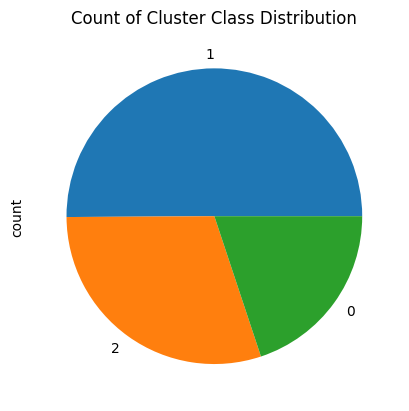

In [24]:
vect_df['Cluster #'].value_counts().plot(kind='pie', title='Count of Cluster Class Distribution')

Imbalanced Data

In [30]:
def pretty(d, indent=0):
   for key, value in d.items():
      print('\t' * indent + str(key))
      if isinstance(value, dict):
         pretty(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))

In [36]:
f1_scores = {}

for name, model in classfiers.items():
    model.fit(X_train, y_train)
    report = classification_report(y_test, model.predict(X_test), output_dict=True)
    
    print(name)
    pretty(report)
    print('-' * 30)
    
    f1_scores[name] = report['macro avg']['f1-score']
    

c:\Users\Anush\Desktop\Projects\profile-matching\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anush\Desktop\Projects\profile-matching\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Anush\Desktop\Projects\profile-matching\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

Baseline
0
	precision
		0.0
	recall
		0.0
	f1-score
		0.0
	support
		341.0
1
	precision
		0.4987878787878788
	recall
		1.0
	f1-score
		0.6655883542256369
	support
		823.0
2
	precision
		0.0
	recall
		0.0
	f1-score
		0.0
	support
		486.0
accuracy
	0.4987878787878788
macro avg
	precision
		0.16626262626262625
	recall
		0.3333333333333333
	f1-score
		0.22186278474187895
	support
		1650.0
weighted avg
	precision
		0.24878934802571165
	recall
		0.4987878787878788
	f1-score
		0.3319874033501207
	support
		1650.0
------------------------------
KNN
0
	precision
		0.6398601398601399
	recall
		0.5366568914956011
	f1-score
		0.583732057416268
	support
		341.0
1
	precision
		0.6982942430703625
	recall
		0.795868772782503
	f1-score
		0.7438955139125497
	support
		823.0
2
	precision
		0.6924882629107981
	recall
		0.6069958847736625
	f1-score
		0.6469298245614035
	support
		486.0
accuracy
	0.6866666666666666
macro avg
	precision
		0.6768808819471
	recall
		0.6465071830172555
	f1-score
		0.65818579863

In [37]:
print(max(f1_scores, key=f1_scores.get), 'Score:', max(f1_scores.values()))


SVM Score: 0.6639976054286746


In [38]:
best_model = svm.fit(X, y)

In [39]:
classification_report(y, best_model.predict(X), output_dict=True)

{'0': {'precision': 0.8774104683195593,
  'recall': 0.48514851485148514,
  'f1-score': 0.624816086316822,
  'support': 1313.0},
 '1': {'precision': 0.7792676637441981,
  'recall': 0.9140955837870538,
  'f1-score': 0.8413140311804009,
  'support': 3306.0},
 '2': {'precision': 0.842685370741483,
  'recall': 0.8490661282180717,
  'f1-score': 0.8458637163691225,
  'support': 1981.0},
 'accuracy': 0.8092424242424242,
 'macro avg': {'precision': 0.8331211676017468,
  'recall': 0.7494367422855369,
  'f1-score': 0.7706646112887817,
  'support': 6600.0},
 'weighted avg': {'precision': 0.8178270546486026,
  'recall': 0.8092424242424242,
  'f1-score': 0.7996096561429733,
  'support': 6600.0}}

In [41]:
dump(svm, "refined_model.joblib")

['refined_model.joblib']